### **0. Set-up**

In [2]:
# Import libraries and utils
%run '../../../utils.ipynb'

In [3]:
# Load NL predicted
raw_nl_pred = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/nl/f4.csv")

In [4]:
# Load EN predicted
raw_en_pred = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/en/f4.csv")

# Drop rows in EN SimLex that are missing in NL SimLex
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'awful')].index)
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'terrible')].index)

# Reset index
raw_en_pred = raw_en_pred.reset_index(drop=True)

In [5]:
# Select first 25 word pairs
raw_nl_pred = raw_nl_pred.head(25)
raw_en_pred = raw_en_pred.head(25)

In [6]:
# Show results
raw_nl_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,oud,nieuw,0.05,0.25,0.14,0.5,0.01,0.01,0.01,1.0,1.0,1.00,1.0,0.10,0.12,0.14,0.60
1,slim,intelligent,0.80,0.85,0.00,1.0,4.50,4.50,4.96,1.0,1.0,0.67,4.0,0.95,0.95,4.49,0.95
2,hard,moeilijk,0.10,0.40,0.00,0.2,0.50,0.01,1.05,0.0,0.0,0.00,1.0,0.20,0.05,1.10,0.10
3,gelukkig,vrolijk,0.50,0.75,0.71,0.6,3.50,3.50,3.83,1.0,0.0,1.00,3.0,0.90,0.90,3.48,0.85
4,hard,stoer,0.20,0.40,0.29,0.4,2.00,2.00,2.37,0.0,0.0,0.67,2.0,0.70,0.60,3.15,0.40
5,snel,razendsnel,0.90,0.85,1.00,1.0,4.50,4.50,4.76,1.0,1.0,1.00,4.0,0.95,0.90,4.94,1.00
6,gelukkig,blij,0.80,0.80,0.86,0.8,3.00,3.00,4.26,0.0,1.0,1.00,3.0,0.90,1.00,4.27,0.80
7,kort,lang,0.10,0.25,0.00,0.2,1.00,0.01,0.01,0.0,0.0,0.00,2.0,0.80,0.05,1.52,0.15
8,dom,stom,0.70,0.70,0.00,0.8,2.50,3.00,4.16,1.0,1.0,0.67,4.0,0.85,0.95,4.29,0.85
9,vreemd,eigenaardig,0.90,0.90,1.00,1.0,4.00,4.00,4.92,1.0,1.0,1.00,4.0,0.95,0.95,4.90,0.90


In [7]:
# Show results
raw_en_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,old,new,0.05,2.0,0.05,0.01,0.19,0.08,1.00,0.08,0.15,0.15,0.50,0.05,0.27,1.13,0.05
1,smart,intelligent,4.50,5.0,0.95,0.95,0.83,1.00,0.90,1.00,1.00,0.87,0.95,0.95,1.00,4.00,0.95
2,hard,difficult,4.50,4.0,0.85,0.80,0.70,0.95,0.90,0.96,0.85,0.78,0.90,0.95,0.82,3.00,0.95
3,happy,cheerful,4.00,4.0,0.85,0.80,0.84,0.95,0.80,0.75,0.70,0.85,0.85,0.80,0.90,3.00,0.85
4,hard,easy,1.00,1.0,0.15,0.03,0.26,0.08,0.10,0.23,0.25,0.23,0.20,0.10,0.37,1.00,0.10
5,fast,rapid,4.50,5.0,0.95,0.90,0.84,0.95,0.95,0.95,0.95,0.90,0.90,0.95,0.86,4.00,0.90
6,happy,glad,3.75,4.0,0.80,0.70,0.85,0.85,0.70,0.83,0.70,0.78,0.80,0.70,0.76,3.00,0.75
7,short,long,4.25,4.0,0.75,0.85,0.75,0.90,0.90,0.73,0.70,0.31,0.85,0.10,0.77,3.00,0.90
8,stupid,dumb,4.50,4.0,0.85,0.90,0.84,0.95,0.85,0.91,0.95,0.95,0.90,0.90,0.95,3.50,0.95
9,weird,strange,4.75,5.0,0.95,0.90,0.83,0.95,0.95,0.91,0.90,0.92,0.90,0.90,0.93,4.50,0.95


### **1. Data Processing**

In [8]:
# Copy dataframe
nl_pred = raw_nl_pred.copy()

# List of columns to scale
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Scale the similarity scores from 0-5 to 0-10
nl_pred[similarity_cols] = nl_pred[similarity_cols] * 2

# Calculate the mean SimLex-999
nl_pred['nl_pred_sl'] = nl_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
nl_pred['nl_pred_sd'] = nl_pred[similarity_cols].std(axis=1).round(2)

# Select columns
nl_pred = nl_pred[['word1', 'word2', 'nl_pred_sl', 'nl_pred_sd']]

# Show results
nl_pred

,word1,word2,nl_pred_sl,nl_pred_sd
0,oud,nieuw,0.79,0.83
1,slim,intelligent,4.08,3.64
2,hard,moeilijk,0.63,0.82
3,gelukkig,vrolijk,3.27,2.74
4,hard,stoer,2.02,2.01
5,snel,razendsnel,4.31,3.52
6,gelukkig,blij,3.40,2.79
7,kort,lang,0.81,1.27
8,dom,stom,3.40,2.93
9,vreemd,eigenaardig,4.19,3.37


In [9]:
# Copy dataframe
en_pred = raw_en_pred.copy()

# List of columns to scale
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Scale the similarity scores from 0-5 to 0-10
en_pred[similarity_cols] = en_pred[similarity_cols] * 2

# Calculate the mean SimLex-999
en_pred['en_pred_sl'] = en_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
en_pred['en_pred_sd'] = en_pred[similarity_cols].std(axis=1).round(2)

# Select columns
en_pred = en_pred[['word1', 'word2', 'en_pred_sl', 'en_pred_sd']]

# Show results
en_pred

,word1,word2,en_pred_sl,en_pred_sd
0,old,new,0.77,1.13
1,smart,intelligent,3.31,2.97
2,hard,difficult,2.92,2.53
3,happy,cheerful,2.79,2.39
4,hard,easy,0.68,0.70
5,fast,rapid,3.27,2.99
6,happy,glad,2.66,2.37
7,short,long,2.63,2.61
8,stupid,dumb,3.05,2.59
9,weird,strange,3.37,3.18


In [10]:
# Concatenate NL and EN DataFrames
conc = pd.concat([nl_pred, en_pred], axis=1)

# Show results
conc

,word1,word2,nl_pred_sl,nl_pred_sd,word1,word2,en_pred_sl,en_pred_sd
0,oud,nieuw,0.79,0.83,old,new,0.77,1.13
1,slim,intelligent,4.08,3.64,smart,intelligent,3.31,2.97
2,hard,moeilijk,0.63,0.82,hard,difficult,2.92,2.53
3,gelukkig,vrolijk,3.27,2.74,happy,cheerful,2.79,2.39
4,hard,stoer,2.02,2.01,hard,easy,0.68,0.70
5,snel,razendsnel,4.31,3.52,fast,rapid,3.27,2.99
6,gelukkig,blij,3.40,2.79,happy,glad,2.66,2.37
7,kort,lang,0.81,1.27,short,long,2.63,2.61
8,dom,stom,3.40,2.93,stupid,dumb,3.05,2.59
9,vreemd,eigenaardig,4.19,3.37,weird,strange,3.37,3.18


### **2. Descriptive Statistics**

In [11]:
# Summary statistics SimLex-999
nl_pred_sl_summary = round(nl_pred['nl_pred_sl'].describe(), 2)
en_pred_sl_summary = round(en_pred['en_pred_sl'].describe(), 2)

# Add median SimLex-999
nl_pred_sl_summary['median'] = round(nl_pred['nl_pred_sl'].median(), 2)
en_pred_sl_summary['median'] = round(en_pred['en_pred_sl'].median(), 2)

# Summary statistics standard deviations
nl_pred_sd_summary = round(nl_pred['nl_pred_sd'].describe(), 2)
en_pred_sd_summary = round(en_pred['en_pred_sd'].describe(), 2)

# Add median standard deviation
nl_pred_sd_summary['median'] = round(nl_pred['nl_pred_sd'].median(), 2)
en_pred_sd_summary['median'] = round(en_pred['en_pred_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "nl_pred_sl": nl_pred_sl_summary,
    "en_pred_sl": en_pred_sl_summary,
    "nl_pred_sd": nl_pred_sd_summary,
    "en_pred_sd": en_pred_sd_summary
})

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,25.00,25.00,25.00,25.00
mean,2.59,2.59,2.34,2.32
std,1.53,0.82,1.16,0.80
min,0.45,0.68,0.68,0.70
25%,0.81,2.17,0.93,2.02
50%,3.35,2.87,2.79,2.53
75%,3.96,3.27,3.37,2.99
max,4.46,3.37,3.71,3.18
median,3.35,2.87,2.79,2.53


#### **2.1. SimLex-999**

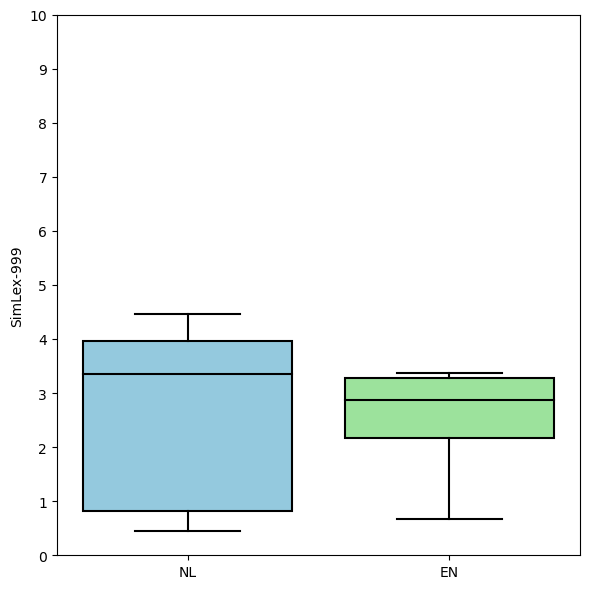

In [12]:
# Rename columns and copy
renamed_nl_pred_sl = nl_pred.rename(columns={"nl_pred_sl": "SimLex-999"}).copy()
renamed_en_pred_sl = en_pred.rename(columns={"en_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_nl_pred_sl['Score'] = 'NL'
renamed_en_pred_sl['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sl, renamed_en_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **2.2. Standard Deviation**

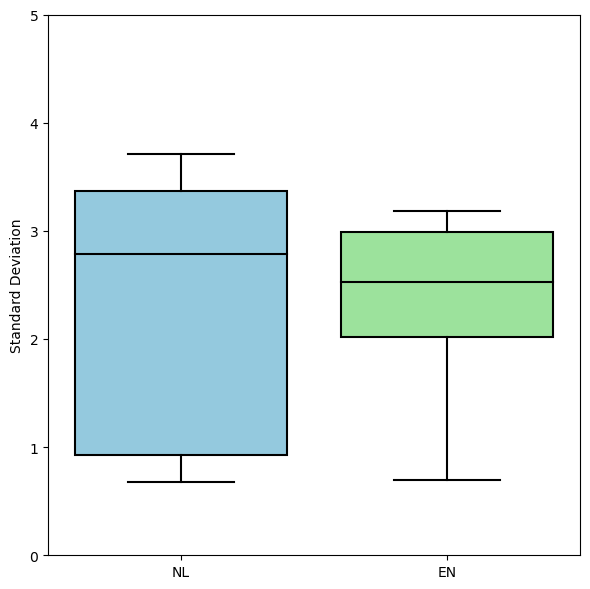

In [13]:
# Rename columns and copy
renamed_nl_pred_sd = nl_pred.rename(columns={"nl_pred_sd": "Standard Deviation"}).copy()
renamed_en_pred_sd = en_pred.rename(columns={"en_pred_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_nl_pred_sd['Score'] = 'NL'
renamed_en_pred_sd['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sd, renamed_en_pred_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 5)  # Setting y-axis limits from 0 to 5

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

#### **3.1. SimLex-999**

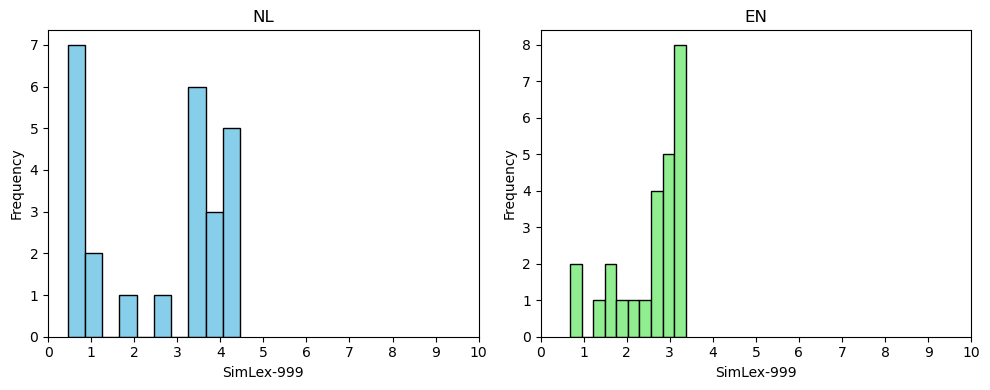

In [14]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.2. Standard Deviation**

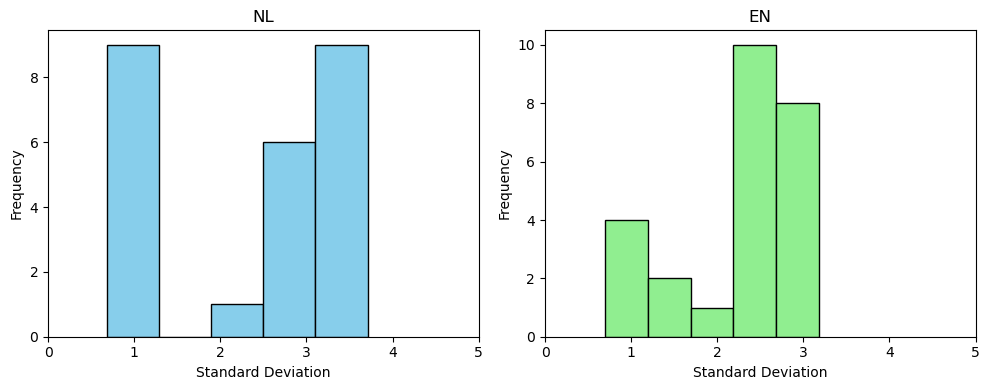

In [15]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 5

# Define bins
bins = 5

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. NL**

In [16]:
# Count outliers
print_outlier_counts(nl_pred)

No outliers found in columns: nl_pred_sl, nl_pred_sd


In [17]:
# Row outliers
print_outlier_data(nl_pred, 'nl_pred_sd')

No outliers found in nl_pred_sd


#### **4.2. EN**

In [18]:
# Count outliers
print_outlier_counts(en_pred)

No outliers found in columns: en_pred_sl, en_pred_sd


In [19]:
# Row outliers
print_outlier_data(en_pred, 'en_pred_sl')

No outliers found in en_pred_sl


#### **4.3. Add to Summary**

In [20]:
# Calculate outliers
outliers_nl_pred_sl = calculate_outliers(nl_pred, 'nl_pred_sl')
outliers_nl_pred_sd = calculate_outliers(nl_pred, 'nl_pred_sd')
outliers_en_pred_sl = calculate_outliers(en_pred, 'en_pred_sl')
outliers_en_pred_sd = calculate_outliers(en_pred, 'en_pred_sd')

# Count outliers
count_outliers_nl_pred_sl = outliers_nl_pred_sl.shape[0]
count_outliers_nl_pred_sd = outliers_nl_pred_sd.shape[0]
count_outliers_en_pred_sl = outliers_en_pred_sl.shape[0]
count_outliers_en_pred_sd = outliers_en_pred_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_nl_pred_sl, count_outliers_en_pred_sl, count_outliers_nl_pred_sd, count_outliers_en_pred_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,25.00,25.00,25.00,25.00
mean,2.59,2.59,2.34,2.32
std,1.53,0.82,1.16,0.80
min,0.45,0.68,0.68,0.70
25%,0.81,2.17,0.93,2.02
50%,3.35,2.87,2.79,2.53
75%,3.96,3.27,3.37,2.99
max,4.46,3.37,3.71,3.18
median,3.35,2.87,2.79,2.53
outliers,0.00,0.00,0.00,0.00


### **5. Correlation**

#### **5.1. SimLex-999 vs Standard Deviation**

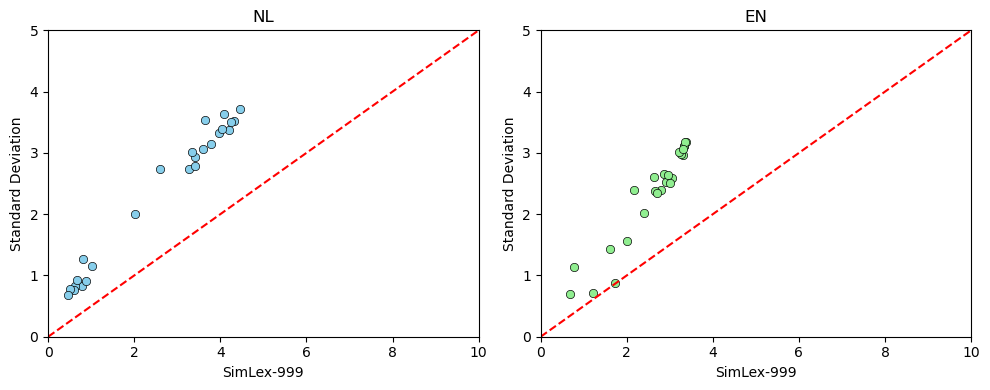

In [21]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10
y_min = 0
y_max = 5

# Create scatter plot
sns.scatterplot(x='nl_pred_sl', y='nl_pred_sd', data=nl_pred, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('NL')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='en_pred_sl', y='en_pred_sd', data=en_pred, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('EN')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [22]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(conc, 'nl_pred_sl', 'nl_pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(conc, 'en_pred_sl', 'en_pred_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,nl_pred_sl,nl_pred_sd,0.96653,4.381995e-15,significant
1,en_pred_sl,en_pred_sd,0.94806,6.259866e-13,significant


### **6. Evaluation Metrics**

#### **6.1. Spearmans's Rank Correlation**

##### **6.1.1. NL SimLex-999 vs EN SimLex-999**

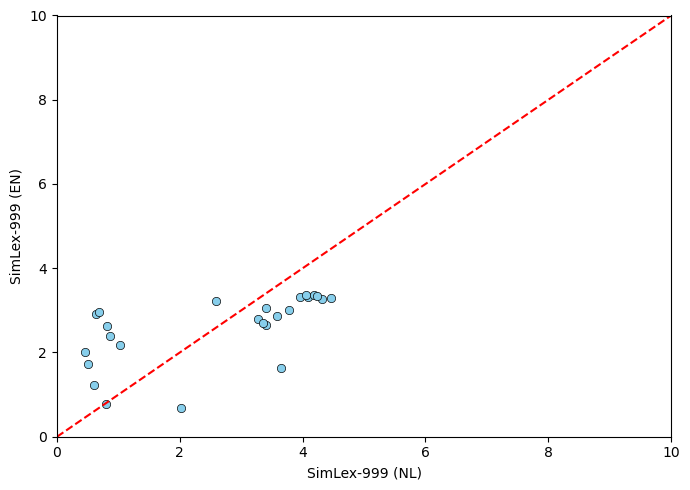

In [23]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sl', 'en_pred_sl', 'SimLex-999 (NL)', 'SimLex-999 (EN)', 0, 10, 0, 10)

In [24]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'nl_pred_sl', 'en_pred_sl')

Spearman's Rank correlation: 0.73668
P-value: 2.677747434988478e-05
The correlation is statistically significant.



##### **6.1.2. NL Standard Deviation vs EN Standard Deviation**

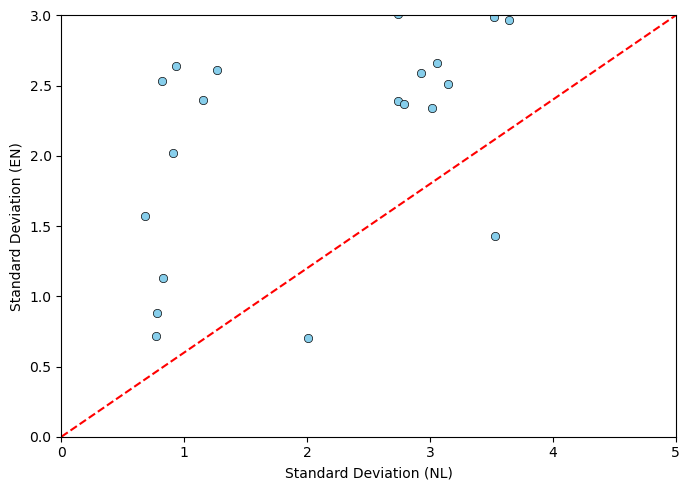

In [25]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sd', 'en_pred_sd', 'Standard Deviation (NL)', 'Standard Deviation (EN)', 0, 5, 0, 3)

In [26]:
# Correlation and p-value
print_correlation_and_pvalue(conc, 'nl_pred_sd', 'en_pred_sd')

Spearman's Rank correlation: 0.63883
P-value: 0.0005879135327059971
The correlation is statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [27]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 1.43


#### **7.3. Mean Absolute Error (MAE)**

In [28]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.05
